In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# Renombrar columnas para facilitar el manejo (Buena práctica en EDA)
df.columns = ['gender', 'race/ethnicity', 'parental_level_of_education', 
              'lunch', 'test_preparation_course', 'math_score', 
              'reading_score', 'writing_score']

print("--- Primer Vistazo y Tipos de Datos ---")
df.info()
print("\n--- Resumen Estadístico de Variables Numéricas ---")
print(df.describe().T) # Usamos .T para transponer y mejorar la lectura
print("\n--- Conteo de Valores Faltantes (Limpieza) ---")
print(df.isnull().sum())
print("\n--- Exploración de Variables Categóricas (Valores Únicos) ---")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna '{col}': {df[col].nunique()} valores únicos.")
    print(df[col].value_counts())

--- Primer Vistazo y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

--- Resumen Estadístico de Variables Numéricas ---
                count    mean        std   min    25%   50%   75%    max
math_score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading_score  1000.0  69.169  14.60

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


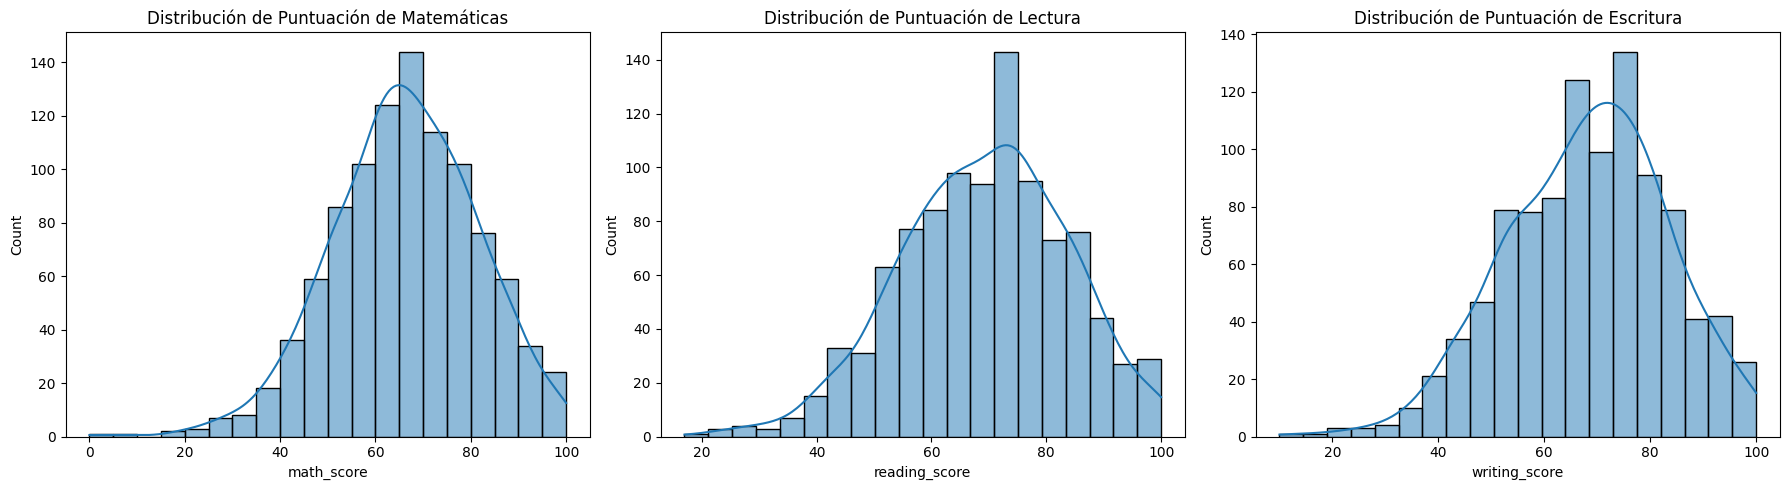


Conclusión rápida sobre distribución: Las puntuaciones parecen seguir una distribución aproximadamente normal, centrada alrededor de 65-70 puntos.


In [3]:
## Distribución de Puntuaciones (Histogramas y KDE) 
plt.figure(figsize=(18, 5))

# Math Score
plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], kde=True, bins=20)
plt.title('Distribución de Puntuación de Matemáticas')

# Reading Score
plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], kde=True, bins=20)
plt.title('Distribución de Puntuación de Lectura')

# Writing Score
plt.subplot(1, 3, 3)
sns.histplot(df['writing_score'], kde=True, bins=20)
plt.title('Distribución de Puntuación de Escritura')

plt.tight_layout()
plt.show()

print("\nConclusión rápida sobre distribución: Las puntuaciones parecen seguir una distribución aproximadamente normal, centrada alrededor de 65-70 puntos.")

# Analizando el efecto del Género en las Puntuaciones (Diagramas de Caja)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math_score', data=df)
plt.title('Matemáticas por Género')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading_score', data=df)
plt.title('Lectura por Género')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing_score', data=df)
plt.title('Escritura por Género')

plt.tight_layout()
plt.show()

# Analizando el efecto del Curso de Preparación en las Puntuaciones
plt.figure(figsize=(18, 6))
score_cols = ['math_score', 'reading_score', 'writing_score']
df_melted = df.melt(id_vars='test_preparation_course', value_vars=score_cols, 
                    var_name='Subject', value_name='Score')

sns.boxplot(x='Subject', y='Score', hue='test_preparation_course', data=df_melted)
plt.title('Puntuaciones por Estado del Curso de Preparación')
plt.show()

print("\nConclusión rápida sobre factores: Las mujeres tienden a tener mejores puntuaciones en Lectura y Escritura, mientras que los hombres en Matemáticas. Los estudiantes que completaron el curso de preparación consistentemente obtienen mejores resultados en las tres materias.")

# Correlación (ya lo tenías, pero es bueno repetirlo para el contexto)
print("\n--- Matriz de Correlación Numérica ---")
corr = df[score_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Puntuaciones')
plt.show()

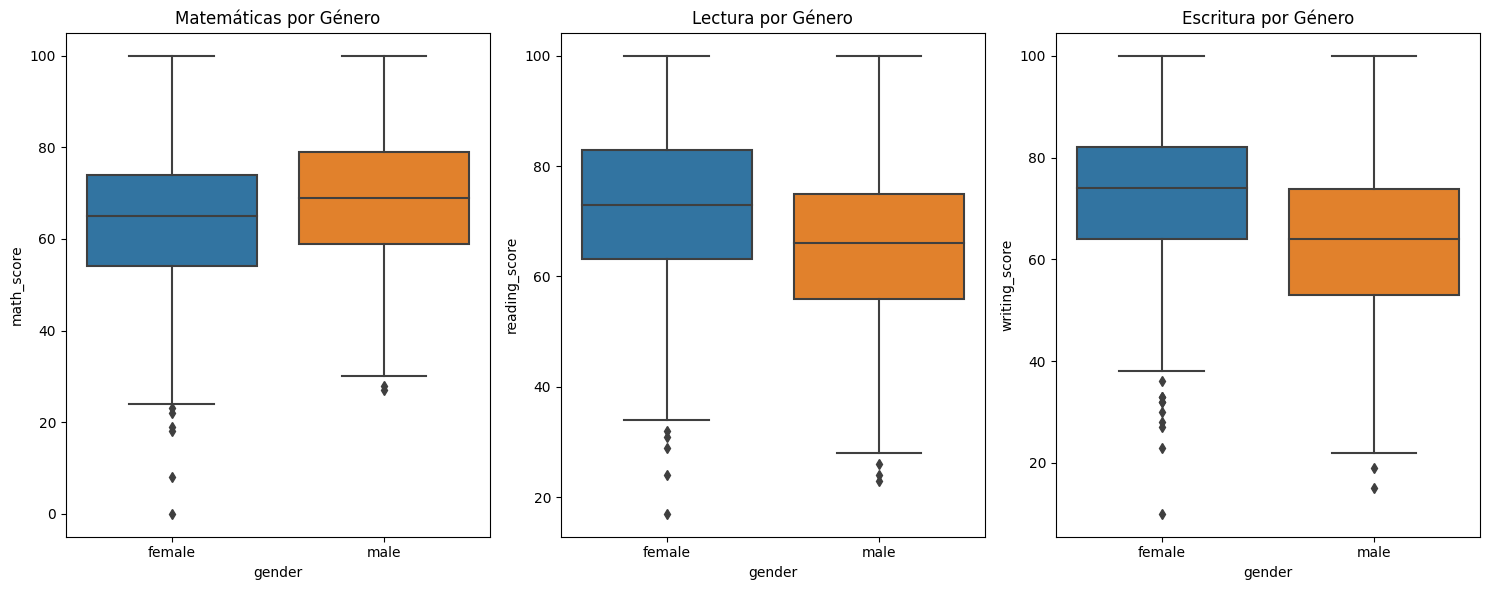

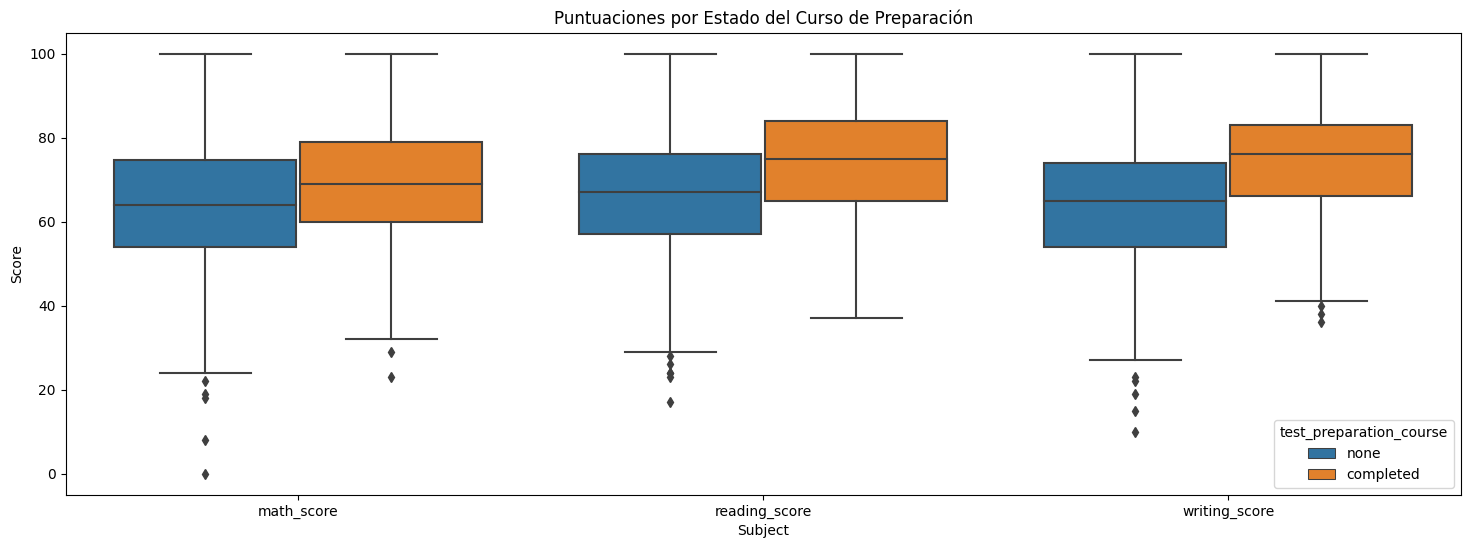


Conclusión rápida sobre factores: Las mujeres tienden a tener mejores puntuaciones en Lectura y Escritura, mientras que los hombres en Matemáticas. Los estudiantes que completaron el curso de preparación consistentemente obtienen mejores resultados en las tres materias.

--- Matriz de Correlación Numérica ---


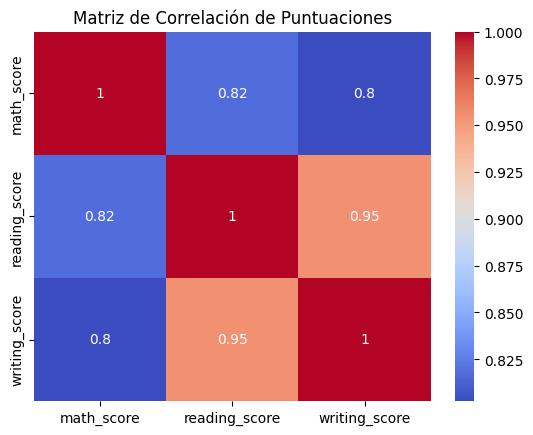

In [5]:
# Analizando el efecto del Género en las Puntuaciones (Diagramas de Caja)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math_score', data=df)
plt.title('Matemáticas por Género')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading_score', data=df)
plt.title('Lectura por Género')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing_score', data=df)
plt.title('Escritura por Género')

plt.tight_layout()
plt.show()

# Analizando el efecto del Curso de Preparación en las Puntuaciones
plt.figure(figsize=(18, 6))
score_cols = ['math_score', 'reading_score', 'writing_score']
df_melted = df.melt(id_vars='test_preparation_course', value_vars=score_cols, 
                    var_name='Subject', value_name='Score')

sns.boxplot(x='Subject', y='Score', hue='test_preparation_course', data=df_melted)
plt.title('Puntuaciones por Estado del Curso de Preparación')
plt.show()

print("\nConclusión rápida sobre factores: Las mujeres tienden a tener mejores puntuaciones en Lectura y Escritura, mientras que los hombres en Matemáticas. Los estudiantes que completaron el curso de preparación consistentemente obtienen mejores resultados en las tres materias.")

# Correlación (ya lo tenías, pero es bueno repetirlo para el contexto)
print("\n--- Matriz de Correlación Numérica ---")
corr = df[score_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Puntuaciones')
plt.show()